# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.420  1  0.879 0.350 0.005   
                             age        0.030  1  0.062 0.804 0.000   
                             Kiel       1.561  1  3.268 0.072 0.017   
                             Magdeburg  4.261  1  8.923 0.003 0.045   
                             Sweden     7.382  1 15.458 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.209  1  0.239 0.626 0.001   
                             age        3.778  1  4.315 0.039 0.022   
                             Kiel       0.273  1  0.312 0.577 0.002   
                             Magdeburg  2.137  1  2.441 0.120 0.013   
                             Sweden    16.884  1 19.286 0.000 0.092   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.456  0.513    False  
                             age               0.095  0.884    False  
                             Kiel              1.141  0.162    False  
                             Magdeburg         2.497  0.013     True  
                             Sweden            3.928  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.204  0.752    False  
                             age               1.408  0.101    False  
                             Kiel              0.239  0.713    False  
                             Magdeburg         0.921  0.241    False  
                             Sweden            4.730  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.047  1  7.504 0.007 0.038   
                             age        0.005  1  0.032 0.858 0.000   
                             Kiel       0.281  1  2.012 0.158 0.010   
                             Magdeburg  0.522  1  3.738 0.055 0.019   
                             Sweden     1.792  1 12.835 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.828  1  6.492 0.012 0.033   
                             age        0.914  1  1.551 0.215 0.008   
                             Kiel       3.581  1  6.074 0.015 0.031   
                             Magdeburg  3.095  1  5.249 0.023 0.027   
                             Sweden    20.927  1 35.497 0.000 0.157   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.171  0.019     True  
                             age               0.067  0.908    False  
                             Kiel              0.802  0.261    False  
                             Magdeburg         1.262  0.112    False  
                             Sweden            3.365  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.935  0.031     True  
                             age               0.669  0.332    False  
                             Kiel              1.836  0.037     True  
                             Magdeburg         1.637  0.054    False  
                             Sweden            7.918  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.171  0.019     True   
                             age       0.858         0.067  0.908    False   
                             Kiel      0.158         0.802  0.261    False   
                             Magdeburg 0.055         1.262  0.112    False   
                             Sweden    0.000         3.365  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.012         1.935  0.031     True   
                             age       0.215         0.669  0.332    False   
                             Kiel      0.015         1.836  0.037     True   
                             Magdeburg 0.023         1.637  0.054    False   
                             Sweden    0.000         7.918  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.350         0.456  0.513    False  
                             age       0.804         0.095  0.884    False  
                             Kiel      0.072         1.141  0.162    False  
                             Magdeburg 0.003         2.497  0.013     True  
                             Sweden    0.000         3.928  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.626         0.204  0.752    False  
                             age       0.039         1.408  0.101    False  
                             Kiel      0.577         0.239  0.713    False  
                             Magdeburg 0.120         0.921  0.241    False  
                             Sweden    0.000         4.730  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.301     0.279     0.261         2.477     0.338
std       0.294         6.264     0.321     0.303         5.303     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.407     0.002     0.004         0.331     0.016
50%       0.063         1.201     0.126     0.122         0.912     0.245
75%       0.392         3.315     0.523     0.467         2.410     0.623
max       1.000        86.857     1.000     0.999       143.434     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.171   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.496   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.255         0.593   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.258         0.589   
A0A075B6H7                                         AD     0.003         2.508   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.230         0.637   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.618         0.209   
S4R3U6                                             AD     0.012         1.935   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True   
A0A024R0T9;K7ER74;P02655                           AD      0.072    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.379    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.382    False   
A0A075B6H7                                         AD      0.010     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.351    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.726    False   
S4R3U6                                             AD      0.031     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.350         0.456   
A0A024R0T9;K7ER74;P02655                           AD     0.037         1.426   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.106         0.976   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.533         0.274   
A0A075B6H7                                         AD     0.153         0.816   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.023         1.637   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.207         0.685   
S4R3U6                                             AD     0.626         0.204   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.513    False  
A0A024R0T9;K7ER74;P02655                           AD      0.097    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.219    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.678    False  
A0A075B6H7                                         AD      0.286    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.239         1.607     0.299     0.255         1.404     0.338
std       0.292         1.886     0.316     0.292         1.646     0.317
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.007         0.382     0.020     0.012         0.357     0.040
50%       0.086         1.065     0.162     0.131         0.883     0.257
75%       0.415         2.160     0.544     0.439         1.906     0.599
max       1.000        24.449     1.000     0.997        23.309     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,929,1035


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.171  0.019   
A0A024R0T9;K7ER74;P02655                           0.032         1.496  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.255         0.593  0.379   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.258         0.589  0.382   
A0A075B6H7                                         0.003         2.508  0.010   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.230         0.637  0.351   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.618         0.209  0.726   
S4R3U6                                             0.012         1.935  0.031   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.350   
A0A024R0T9;K7ER74;P02655                              False 0.037   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.106   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.533   
A0A075B6H7                                             True 0.153   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.023   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.207   
S4R3U6                                                 True 0.626   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.456  0.513   
A0A024R0T9;K7ER74;P02655                                   1.426  0.097   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.976  0.219   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.274  0.678   
A0A075B6H7                                                 0.816  0.286   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.637  0.066   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.685  0.356   
S4R3U6                                                     0.204  0.752   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    875
DAE (yes) - PI (yes)   332
DAE (yes) - PI (no)    160
DAE (no)  - PI (yes)    54
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.007         2.171  0.019     True 0.350   
A0A075B6H7                   0.003         2.508  0.010     True 0.153   
A0A075B6H9                   0.020         1.702  0.048     True 0.439   
A0A075B6I0                   0.001         3.152  0.003     True 0.034   
A0A075B6J9                   0.012         1.906  0.032     True 0.031   
...                            ...           ...    ...      ...   ...   
Q9UP79                       0.000         4.686  0.000     True 0.666   
Q9UQ52                       0.001         3.292  0.002     True 0.071   
Q9Y281;Q9Y281-3              0.001         2.863  0.005     True 0.283   
Q9Y6C2                       0.004         2.423  0.012     True 0.359   
S4R3U6                       0.012         1.935  0.031     True 0.626   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.456  0.513    False       186  
A0A075B6H7                           0.816  0.286    False        91  
A0A075B6H9                           0.357  0.599    False       189  
A0A075B6I0                           1.473  0.090    False       194  
A0A075B6J9                           1.512  0.084    False       156  
...                                    ...    ...      ...       ...  
Q9UP79                               0.176  0.783    False       135  
Q9UQ52                               1.147  0.161    False       188  
Q9Y281;Q9Y281-3                      0.548  0.444    False        51  
Q9Y6C2                               0.445  0.521    False       119  
S4R3U6                               0.204  0.752    False       126  

[214 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.019,0.513,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.072,0.097,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.379,0.219,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.382,0.678,196,DAE (no) - PI (no)
A0A075B6H7,0.010,0.286,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.351,0.066,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P48745,0.006,0.997,180,DAE (yes) - PI (no),0.992
P51688,0.018,0.966,58,DAE (yes) - PI (no),0.948
P42262;P42262-2;P42262-3,0.011,0.952,87,DAE (yes) - PI (no),0.941
Q8N9I0,0.012,0.949,141,DAE (yes) - PI (no),0.937
A6NCT7;Q07092;Q07092-2,0.011,0.933,147,DAE (yes) - PI (no),0.922
...,...,...,...,...,...
P00740;P00740-2,0.043,0.053,197,DAE (yes) - PI (no),0.010
K7ERG9;P00746,0.042,0.052,197,DAE (yes) - PI (no),0.010
P15531;P15531-2,0.047,0.052,125,DAE (yes) - PI (no),0.005


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


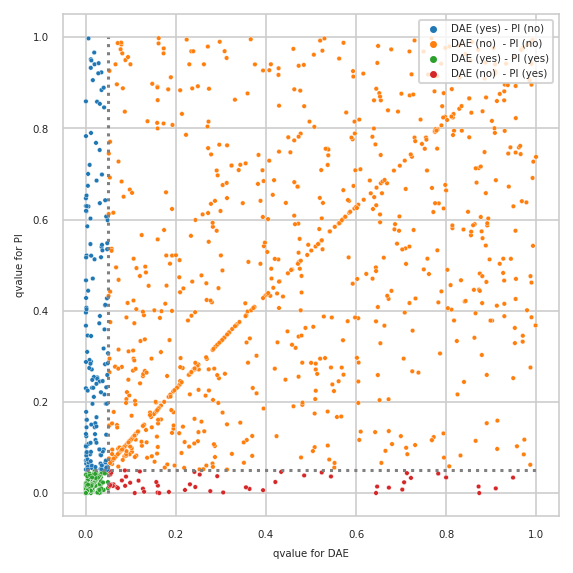

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


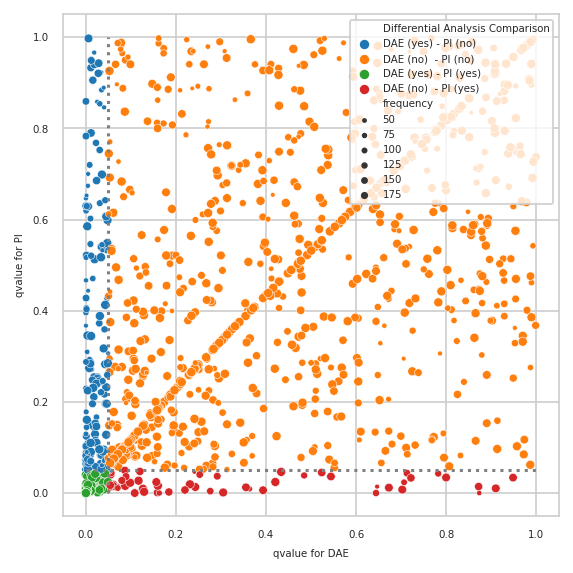

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out